In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# objectives
# analysis

In [2]:
import os
import pandas as pd


def create_dfs(folder_path):
    dataframes = {}
    for file in os.listdir(folder_path):
        if file.endswith(".txt"):
            df = pd.read_csv(os.path.join(folder_path, file), sep="\t")
            df = df.drop("LI out [a.u.]", axis=1)
            df = df.drop("SC110 out [V].1", axis=1)
            dataframes[file] = df
    return dataframes


dfs = create_dfs("SAS")  # what is the better way to store the experimental data?

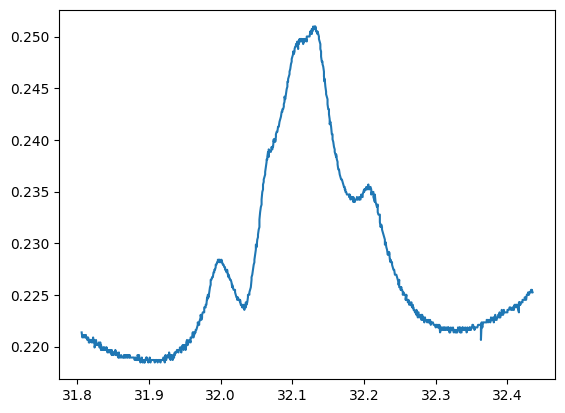

In [3]:
file_name = "SAS_zoomed_0.txt"
df = dfs[file_name]
plt.plot(df["SC110 out [V]"], df["Main in [V]"])

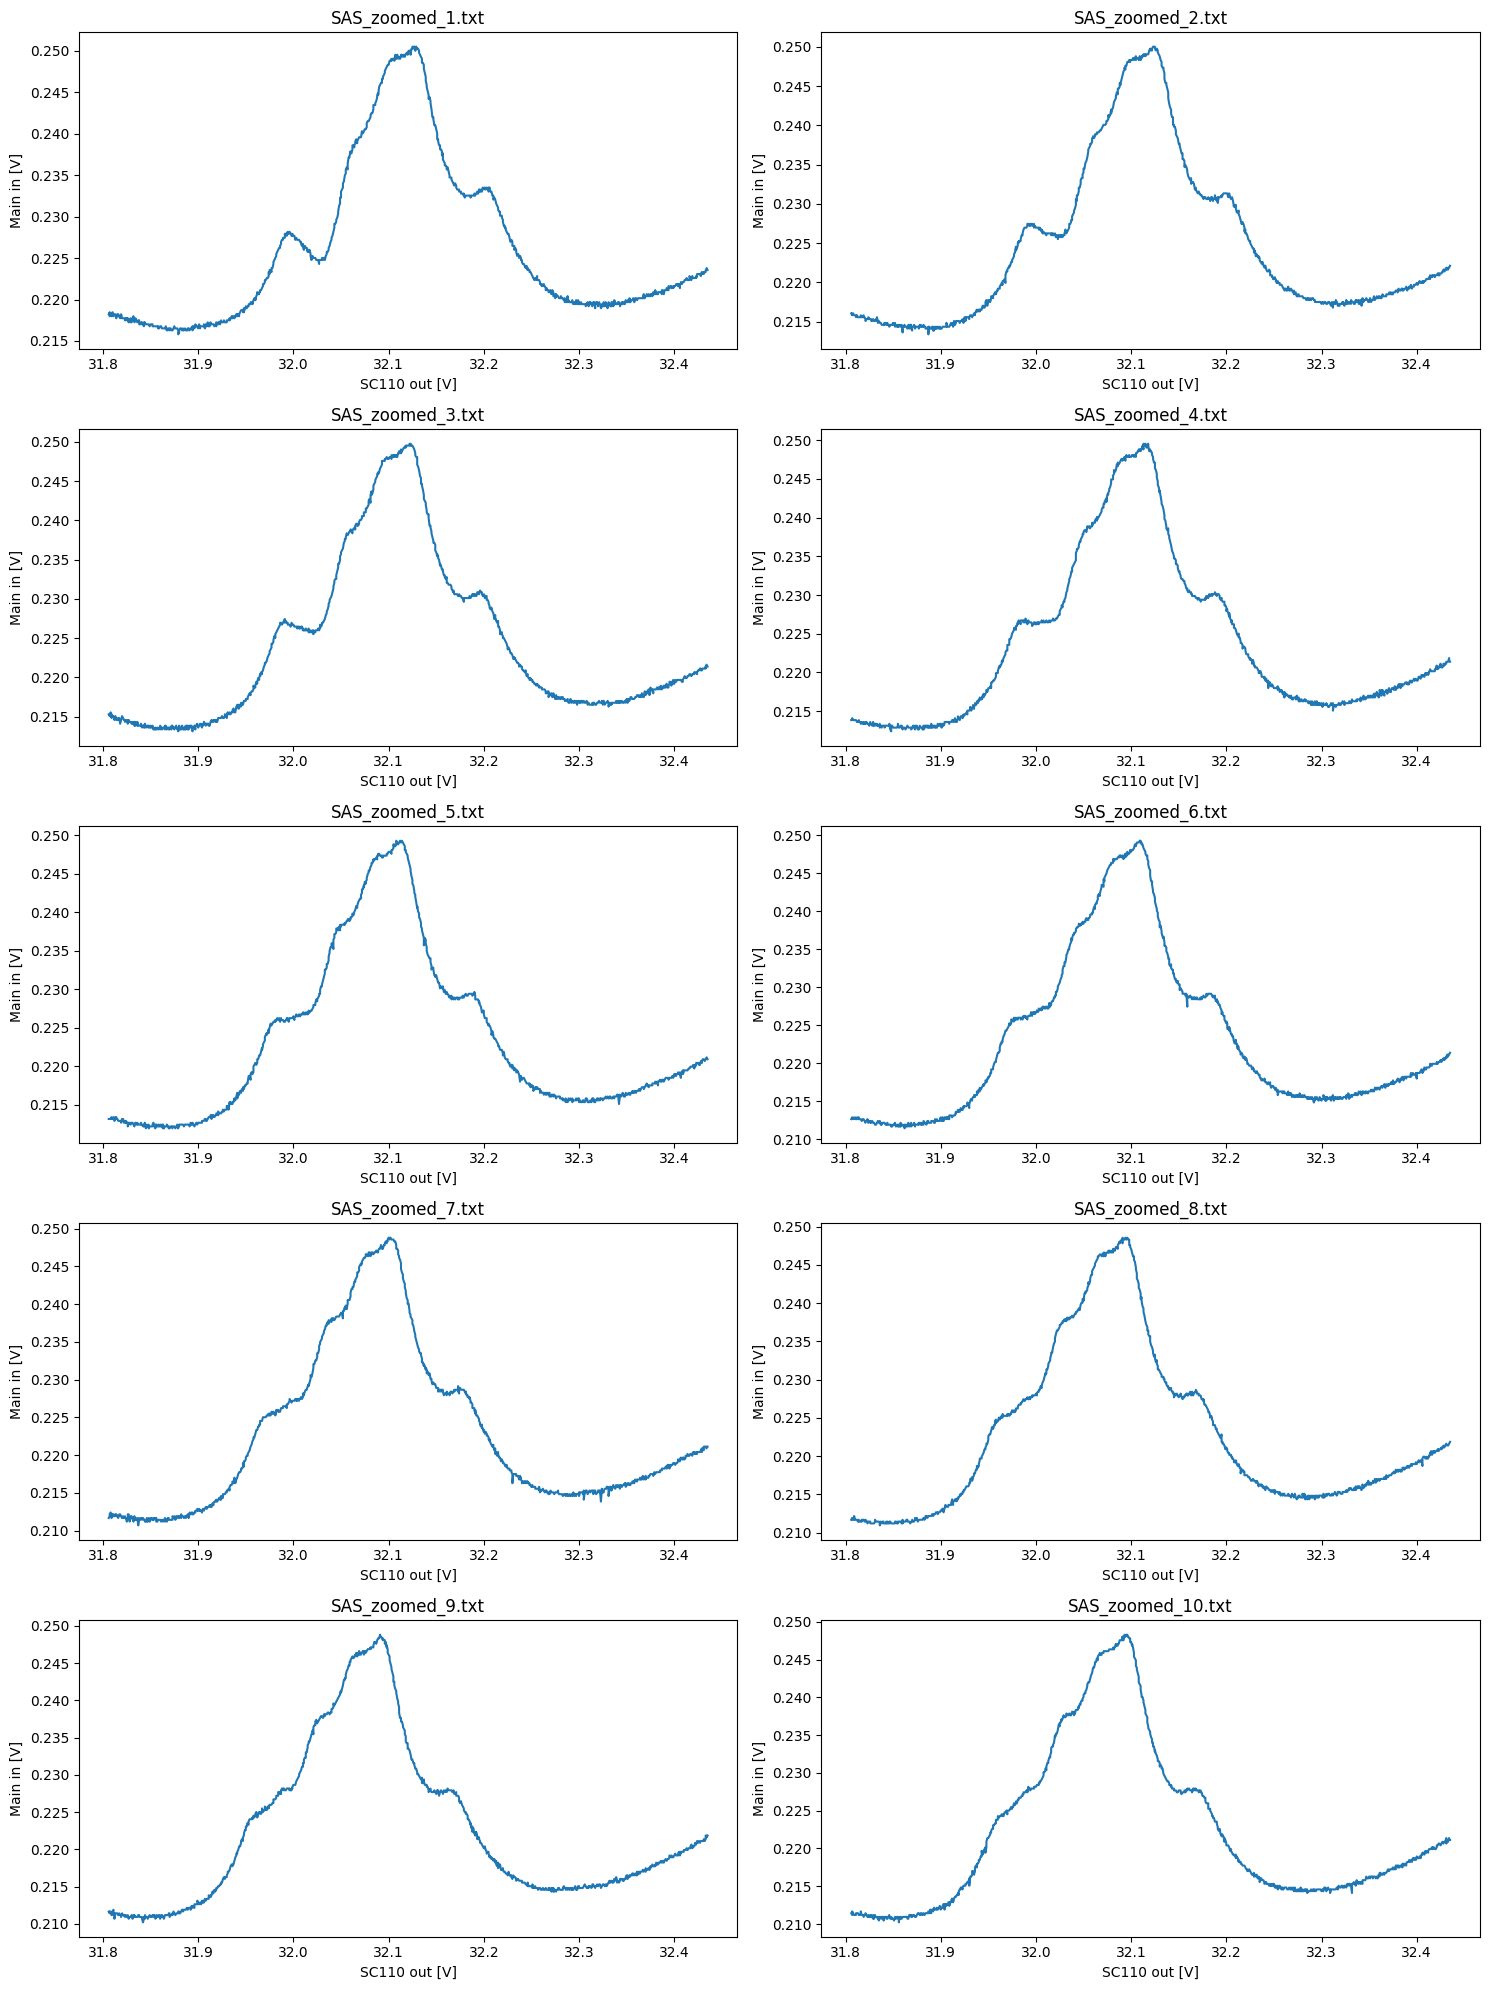

In [4]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

for i in range(1, 11):
    file = f"SAS_zoomed_{i}.txt"
    df = dfs[file]
    ax = axs[(i - 1) // 2, (i - 1) % 2]
    ax.plot(df["SC110 out [V]"], df["Main in [V]"])
    ax.set_title(file)
    ax.set_xlabel("SC110 out [V]")
    ax.set_ylabel("Main in [V]")

plt.tight_layout()

plt.show()

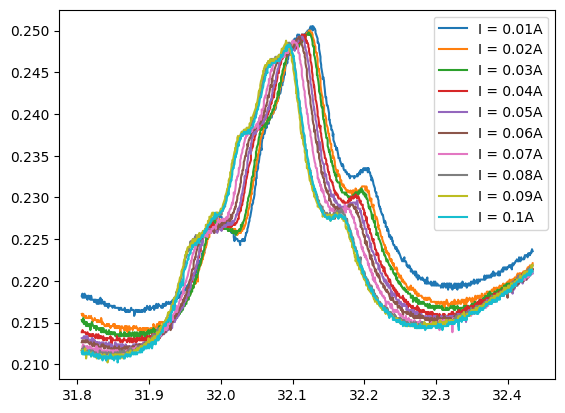

<Figure size 4800x3600 with 0 Axes>

In [5]:
for i in range(1, 11):
    file = f"SAS_zoomed_{i}.txt"
    df = dfs[file]
    plt.plot(df["SC110 out [V]"], df["Main in [V]"], label=f"I = {i/100}A")
    plt.legend()
plt.figure(figsize=(12, 9), dpi=400)
plt.show()

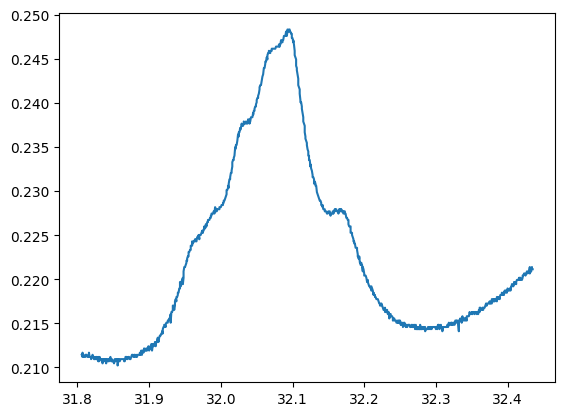

In [6]:
df = dfs[file]
plt.plot(df["SC110 out [V]"], df["Main in [V]"], label=f"I = {i/100}A")

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


# TODO add activation layers
# TODO what is the detuning range of the paper
class CNN1D(nn.Module):
    def __init__(self):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(
            in_channels=1, out_channels=64, kernel_size=4, stride=1, padding=1
        )
        self.conv2 = nn.Conv1d(
            in_channels=64, out_channels=128, kernel_size=4, stride=1, padding=1
        )
        self.pool = nn.MaxPool1d(kernel_size=3, stride=2)  # Pooling size 3

        input_size = 1000  # New input size
        conv1_out = (input_size - 4 + 2) + 1  # Conv1 output size (padding=1)
        pool1_out = (conv1_out - 3) // 2 + 1  # Pool1 output size
        conv2_out = (pool1_out - 4 + 2) + 1  # Conv2 output size (padding=1)
        pool2_out = (conv2_out - 3) // 2 + 1  # Pool2 output size

        self.flattened_size = 128 * pool2_out

        self.fc1 = nn.Linear(
            self.flattened_size, 64
        )  # Adjust input size based on pooling
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten before FC layers
        x = F.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


# Instantiate the model
model = CNN1D()
print(model)

SyntaxError: invalid syntax (124962938.py, line 25)

In [ ]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# step 1 : annotate the data and how
# step 2 :